# Adrenal Gland and ACC:

In [1]:
import glob
import os
import time
from scipy.io import loadmat
import cobra
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = "C:/Users/NOE/Desktop/Mostres TFG Obtingudes/"
files = glob.glob(path + "/*.mat")
print(files)

['C:/Users/NOE/Desktop/Mostres TFG Obtingudes\\CancerModel_aa51d383_ce36_4247_bfcd_d104a121f7d3_4e605b10_da43_45f0_a43d_27.mat', 'C:/Users/NOE/Desktop/Mostres TFG Obtingudes\\CancerModel_x2f7e6f7f_a4f9_4849_8add_3fbafb75b5c2_9406f2f9_832a_42e7_b5e9_a.mat', 'C:/Users/NOE/Desktop/Mostres TFG Obtingudes\\CancerModel_x3fadb519_dd1a_4765_be25_e7ecaaa9b8e0_8919cfd0_6cd6_423f_9231_4.mat', 'C:/Users/NOE/Desktop/Mostres TFG Obtingudes\\NormalModel_GTEX_111CU_0126_SM_5GZWZ.mat', 'C:/Users/NOE/Desktop/Mostres TFG Obtingudes\\NormalModel_GTEX_111YS_0126_SM_5987T.mat', 'C:/Users/NOE/Desktop/Mostres TFG Obtingudes\\NormalModel_GTEX_1122O_0326_SM_5H124.mat']


In [3]:


models = []
solutions = []
for m in files:
    model = cobra.io.load_matlab_model(m)
    model.name = os.path.splitext(os.path.basename(m))[0].replace("_", "-")
    solution = model.optimize()
    
    print(f'Successfully created dataframe for {model.name} with shape {models}')
    models.append(model)
    solutions.append(solution)

No defined compartments in model ContextModel_Cancer. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x


Successfully created dataframe for CancerModel-aa51d383-ce36-4247-bfcd-d104a121f7d3-4e605b10-da43-45f0-a43d-27 with shape []


No defined compartments in model ContextModel_Cancer. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x


Successfully created dataframe for CancerModel-x2f7e6f7f-a4f9-4849-8add-3fbafb75b5c2-9406f2f9-832a-42e7-b5e9-a with shape [<Model ContextModel_Cancer at 0x2334f665050>]


No defined compartments in model ContextModel_Cancer. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x


Successfully created dataframe for CancerModel-x3fadb519-dd1a-4765-be25-e7ecaaa9b8e0-8919cfd0-6cd6-423f-9231-4 with shape [<Model ContextModel_Cancer at 0x2334f665050>, <Model ContextModel_Cancer at 0x23354c8b910>]


No defined compartments in model ContextModel_normal. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x


Successfully created dataframe for NormalModel-GTEX-111CU-0126-SM-5GZWZ with shape [<Model ContextModel_Cancer at 0x2334f665050>, <Model ContextModel_Cancer at 0x23354c8b910>, <Model ContextModel_Cancer at 0x233555a5790>]


No defined compartments in model ContextModel_normal. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x


Successfully created dataframe for NormalModel-GTEX-111YS-0126-SM-5987T with shape [<Model ContextModel_Cancer at 0x2334f665050>, <Model ContextModel_Cancer at 0x23354c8b910>, <Model ContextModel_Cancer at 0x233555a5790>, <Model ContextModel_normal at 0x2335a162d90>]


No defined compartments in model ContextModel_normal. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x


Successfully created dataframe for NormalModel-GTEX-1122O-0326-SM-5H124 with shape [<Model ContextModel_Cancer at 0x2334f665050>, <Model ContextModel_Cancer at 0x23354c8b910>, <Model ContextModel_Cancer at 0x233555a5790>, <Model ContextModel_normal at 0x2335a162d90>, <Model ContextModel_normal at 0x2335eea37d0>]


In [4]:
fluxes_df = pd.DataFrame(index = [model.name for model in models])

for i, solution in enumerate(solutions, start = 0):
    fluxes = solution.fluxes
    
    for reaction, flux in fluxes.items():
        if reaction not in fluxes_df.columns:
            fluxes_df[reaction] = 0.0
        
        fluxes_df.loc[fluxes_df.index[i], reaction] = flux
        fluxes_df = fluxes_df.copy()

fluxes_df.head()

,10FTHF7GLUtl,10FTHF7GLUtm,10FTHFtl,10FTHFtm,11DOCRTSLtm,11DOCRTSLtr,11DOCRTSTRNtm,11DOCRTSTRNtr,13DAMPPOX,1a_25VITD2Hm,...,RSVtev,EX_C13856[e],EX_M00234[e],EX_M01197[e],EX_M02745[e],sink_lys_L[c],sink_phe_L[c],sink_asp_L[c],sink_tyr_L[c],DM_4abut[c]
CancerModel-aa51d383-ce36-4247-bfcd-d104a121f7d3-4e605b10-da43-45f0-a43d-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CancerModel-x2f7e6f7f-a4f9-4849-8add-3fbafb75b5c2-9406f2f9-832a-42e7-b5e9-a,0.0,0.0,0.0,-1000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CancerModel-x3fadb519-dd1a-4765-be25-e7ecaaa9b8e0-8919cfd0-6cd6-423f-9231-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NormalModel-GTEX-111CU-0126-SM-5GZWZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NormalModel-GTEX-111YS-0126-SM-5987T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
def flux_transformer(v):

    '''
    This function transforms fluxes into log2 scale with three additions:
    - zero values are kept.
    - values between 0 and 2 are adjusted to fit below one.
    - negative fluxes are considered. 
    '''

    def adjusted(v):
        new = (np.log2(v + 0.125) + 3) / 4
        return np.min([new, 1])

    if v == 0:
        vprime = 0
    elif v > 0:
        if v < 2:
            vprime = adjusted(v)
        else:
            vprime = np.log2(v)
    elif v < 0:
        v = np.abs(v)
        if v < 2:
            vprime = -adjusted(v)
        else:
            vprime = -np.log2(v)
    else:
        raise ValueError('found value not considered')

    return vprime

In [9]:
t_fluxes_df = fluxes_df.applymap(flux_transformer)
t_fluxes_df
    


,10FTHF7GLUtl,10FTHF7GLUtm,10FTHFtl,10FTHFtm,11DOCRTSLtm,11DOCRTSLtr,11DOCRTSTRNtm,11DOCRTSTRNtr,13DAMPPOX,1a_25VITD2Hm,...,RSVtev,EX_C13856[e],EX_M00234[e],EX_M01197[e],EX_M02745[e],sink_lys_L[c],sink_phe_L[c],sink_asp_L[c],sink_tyr_L[c],DM_4abut[c]
CancerModel-aa51d383-ce36-4247-bfcd-d104a121f7d3-4e605b10-da43-45f0-a43d-27,0,0,0,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0
CancerModel-x2f7e6f7f-a4f9-4849-8add-3fbafb75b5c2-9406f2f9-832a-42e7-b5e9-a,0,0,0,-9.965784,0,0,0,0,0,0,...,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0
CancerModel-x3fadb519-dd1a-4765-be25-e7ecaaa9b8e0-8919cfd0-6cd6-423f-9231-4,0,0,0,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0
NormalModel-GTEX-111CU-0126-SM-5GZWZ,0,0,0,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0
NormalModel-GTEX-111YS-0126-SM-5987T,0,0,0,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0
NormalModel-GTEX-1122O-0326-SM-5H124,0,0,0,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,-8.579218,-5.957262,9.838519,-6.821581,0


In [30]:
cancer_models = t_fluxes_df.iloc[:3, :]
normal_models = t_fluxes_df.iloc[3:, :]


In [31]:
normal_models.head()


,10FTHF7GLUtl,10FTHF7GLUtm,10FTHFtl,10FTHFtm,11DOCRTSLtm,11DOCRTSLtr,11DOCRTSTRNtm,11DOCRTSTRNtr,13DAMPPOX,1a_25VITD2Hm,...,RSVtev,EX_C13856[e],EX_M00234[e],EX_M01197[e],EX_M02745[e],sink_lys_L[c],sink_phe_L[c],sink_asp_L[c],sink_tyr_L[c],DM_4abut[c]
NormalModel-GTEX-111CU-0126-SM-5GZWZ,0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0
NormalModel-GTEX-111YS-0126-SM-5987T,0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0
NormalModel-GTEX-1122O-0326-SM-5H124,0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,-8.579218,-5.957262,9.838519,-6.821581,0


In [32]:
t_statistic, p_values = stats.ttest_ind(normal_models, cancer_models, axis = 0, nan_policy = 'omit')
fold_change = np.log2(np.mean(normal_models, axis = 0)) - np.log2(np.mean(cancer_models, axis = 0))
fold_change[np.isnan(fold_change)] = 0
p_values[np.isnan(p_values)] = 1.0  
reject, q_values = multitest.fdrcorrection(p_values)

t_results = pd.DataFrame({
    'reaction': t_fluxes_df.columns,
    'p_value': p_values,
    'q_value': q_values,
    'log_fc': fold_change
})

t_results['sign'] = 'NORMAL'
for idx, row in t_results.iterrows():
    if row['q_value'] < 0.05 and row['log_fc'] > 1:
        t_results.loc[idx, 'sign'] = 'UP'
    elif row['q_value'] < 0.05 and row['log_fc'] < -1:
        t_results.loc[idx, 'sign'] = 'DOWN'

t_fluxes_sign = t_fluxes_df[t_results[t_results['sign'] != 'NORMAL']['reaction'].values]
t_fluxes_sign.head()

C:\Users\NOE\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:551: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)
C:\Users\NOE\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\NOE\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


,AMPTASECGe,r0130,GLUPROASCT1,GLNHISHISt,GLNHISHISr,HMR_8585,HMR_9187,EX_M01966[e]
CancerModel-aa51d383-ce36-4247-bfcd-d104a121f7d3-4e605b10-da43-45f0-a43d-27,9.763574,9.763574,0.000000,4.113388,4.113388,8.720887,8.720887,8.720887
CancerModel-x2f7e6f7f-a4f9-4849-8add-3fbafb75b5c2-9406f2f9-832a-42e7-b5e9-a,9.784500,9.784500,0.000000,4.254114,4.254114,9.207249,9.207249,9.207249
CancerModel-x3fadb519-dd1a-4765-be25-e7ecaaa9b8e0-8919cfd0-6cd6-423f-9231-4,8.506270,8.506270,0.000000,3.935769,3.935769,8.059095,8.059095,8.059095
NormalModel-GTEX-111CU-0126-SM-5GZWZ,0.000000,0.000000,9.965784,0.000000,0.000000,0.000000,0.000000,0.000000
NormalModel-GTEX-111YS-0126-SM-5987T,0.000000,0.000000,9.965784,0.000000,0.000000,0.000000,0.000000,0.000000


C:\Users\NOE\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


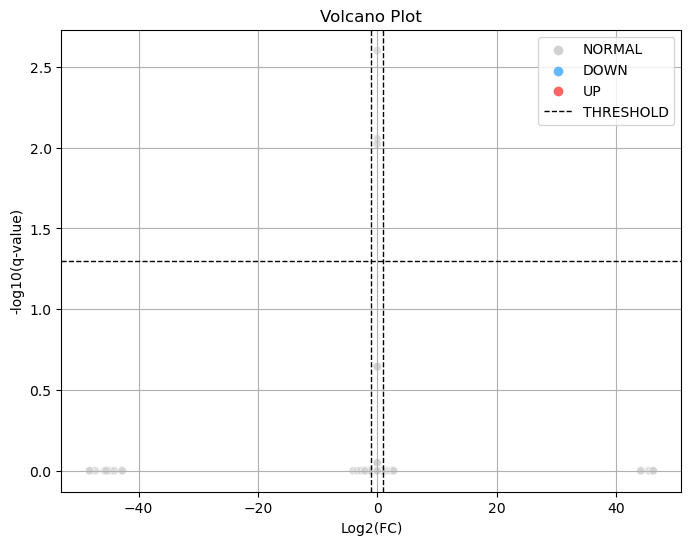

In [43]:
import seaborn as sns
colors2 = {"NORMAL":"#D2D2D2", "UP":"#FF6462", "DOWN":"#62B8FF"}
plt.figure(figsize = (8, 6))

sns.scatterplot(x = t_results['log_fc'], y = -np.log10(t_results['q_value']), hue = t_results['sign'], palette = colors2, alpha = 0.7)
plt.axhline(-np.log10(0.05), color = 'k', linestyle = '--', linewidth = 1, label = 'THRESHOLD')
plt.axvline(1, color = 'k', linestyle = '--', linewidth = 1)
plt.axvline(-1, color = 'k', linestyle = '--', linewidth = 1)

plt.xlabel('Log2(FC)')
plt.ylabel('-log10(q-value)')
plt.title('Volcano Plot')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
from scipy import stats
from statsmodels.stats import multitest

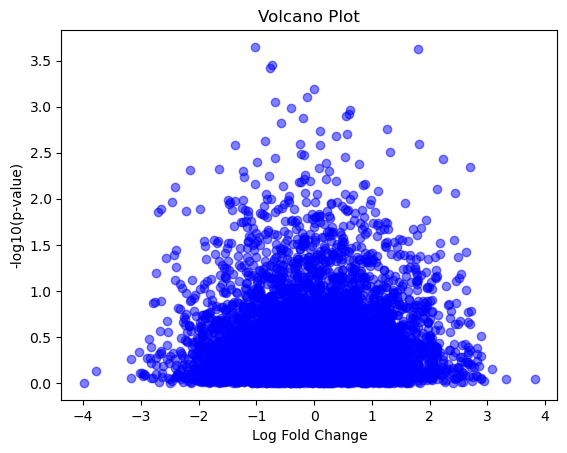

In [42]:
log_fold_change_values = np.random.normal(size=len(t_fluxes_df.columns))
p_values = np.random.uniform(size=len(t_fluxes_df.columns))

# Create a volcano plot
plt.scatter(log_fold_change_values, -np.log10(p_values), color='blue', alpha=0.5)
plt.title('Volcano Plot')
plt.xlabel('Log Fold Change')
plt.ylabel('-log10(p-value)')
plt.show()

# ------------------------------------------------------------------------------------

In [2]:
normal_model1 = cobra.io.load_matlab_model("C:/Users/NOE/Desktop/Mostres TFG Obtingudes/NormalModel_GTEX_111CU_0126_SM_5GZWZ.mat")
normal_model2 = cobra.io.load_matlab_model("C:/Users/NOE/Desktop/Mostres TFG Obtingudes/NormalModel_GTEX_111YS_0126_SM_5987T.mat")
normal_model3 = cobra.io.load_matlab_model("C:/Users/NOE/Desktop/Mostres TFG Obtingudes/NormalModel_GTEX_1122O_0326_SM_5H124.mat")
cancer_model1 = cobra.io.load_matlab_model("C:/Users/NOE/Desktop/Mostres TFG Obtingudes/CancerModel_aa51d383_ce36_4247_bfcd_d104a121f7d3_4e605b10_da43_45f0_a43d_27.mat")
cancer_model2 = cobra.io.load_matlab_model("C:/Users/NOE/Desktop/Mostres TFG Obtingudes/CancerModel_x2f7e6f7f_a4f9_4849_8add_3fbafb75b5c2_9406f2f9_832a_42e7_b5e9_a.mat")
cancer_model3 = cobra.io.load_matlab_model("C:/Users/NOE/Desktop/Mostres TFG Obtingudes/CancerModel_x3fadb519_dd1a_4765_be25_e7ecaaa9b8e0_8919cfd0_6cd6_423f_9231_4.mat")

No defined compartments in model ContextModel_normal. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in model ContextModel_normal. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in model ContextModel_normal. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in model ContextModel_Cancer. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x
No defined compartments in model ContextModel_Cancer. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following

In [72]:
normal_model1.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
2h3mv[e],EX_2h3mv[e],195.5,6,0.92%
2hiv[e],EX_2hiv[e],434.7,5,1.71%
7dhchsterol[e],EX_7dhchsterol[e],5.686,27,0.12%
7dhf[e],EX_7dhf[e],166.7,49,6.43%
CE0074[e],EX_CE0074[e],205.2,4,0.65%
CE2915[e],EX_CE2915[e],120.7,44,4.18%
CE2917[e],EX_CE2917[e],326.1,69,17.71%
CE5786[e],EX_CE5786[e],51.92,56,2.29%
HC00250[e],EX_HC00250[e],1000,0,0.00%
HC01361[e],EX_HC01361[e],953.6,9,6.75%


In [4]:
normal_model2

Name,ContextModel_normal
Memory address,2317e9fadd0
Number of metabolites,3896
Number of reactions,5679
Number of genes,2248
Number of groups,96
Objective expression,1.0*biomass_maintenance - 1.0*biomass_maintenance_reverse_95d2f
Compartments,"c, l, m, r, e, x, n, g, i"


In [5]:
normal_model3

Name,ContextModel_normal
Memory address,23105aa5590
Number of metabolites,3289
Number of reactions,4538
Number of genes,2248
Number of groups,93
Objective expression,1.0*biomass_maintenance - 1.0*biomass_maintenance_reverse_95d2f
Compartments,"c, l, m, r, e, x, g, n, i"


In [6]:
cancer_model1

Name,ContextModel_Cancer
Memory address,2310ab1ea90
Number of metabolites,3900
Number of reactions,5791
Number of genes,2248
Number of groups,95
Objective expression,1.0*biomass_maintenance - 1.0*biomass_maintenance_reverse_95d2f
Compartments,"c, l, m, r, e, x, n, g, i"


In [7]:
cancer_model2

Name,ContextModel_Cancer
Memory address,2317ea0bcd0
Number of metabolites,3779
Number of reactions,5492
Number of genes,2248
Number of groups,97
Objective expression,1.0*biomass_maintenance - 1.0*biomass_maintenance_reverse_95d2f
Compartments,"c, l, m, e, x, n, r, g, i"


In [8]:
cancer_model3

Name,ContextModel_Cancer
Memory address,2310fdc8110
Number of metabolites,3872
Number of reactions,5651
Number of genes,2248
Number of groups,96
Objective expression,1.0*biomass_maintenance - 1.0*biomass_maintenance_reverse_95d2f
Compartments,"c, l, m, r, e, x, n, g, i"


## Flux Balance Analysis (FBA)

### Normal Model 1

In [9]:
solution_normal1=normal_model1.optimize()
print(solution_normal1)

<Solution 278.730 at 0x23119dd0190>


In [10]:
solution_normal1

,fluxes,reduced_costs
10FTHF7GLUtl,0.0,0.000000e+00
10FTHF7GLUtm,0.0,0.000000e+00
10FTHFtl,0.0,-0.000000e+00
11DOCRTSLtm,0.0,0.000000e+00
11DOCRTSLtr,0.0,0.000000e+00
...,...,...
DM_CE1562[c],0.0,0.000000e+00
DM_CE5025[c],0.0,-1.810872e-17
DM_btn[n],0.0,0.000000e+00
Htmi,0.0,-1.004890e-18


In [11]:
x_normal1 = solution_normal1.objective_value
print('La biomassa del model normal 1 és:', x_normal1)

La biomassa del model normal 1 és: 278.7301589121864


### Model Normal 2:

In [21]:
solution_normal2=normal_model2.optimize()
print(solution_normal2)

<Solution 280.619 at 0x23103425710>


In [22]:
solution_normal2

,fluxes,reduced_costs
10FTHF7GLUtl,0.0,-2.775558e-17
10FTHF7GLUtm,0.0,0.000000e+00
10FTHFtl,0.0,0.000000e+00
10FTHFtm,0.0,-0.000000e+00
11DOCRTSLtm,0.0,-0.000000e+00
...,...,...
DM_CE1562[c],0.0,0.000000e+00
DM_1a2425thvitd2[m],0.0,0.000000e+00
DM_btn[n],0.0,0.000000e+00
Htmi,0.0,-5.646801e-18


In [23]:
x_normal2 = solution_normal2.objective_value
print('La biomassa del model de Normal 2 és:', x_normal2)

La biomassa del model de Normal 2 és: 280.61918360952194


### Normal Model 3

In [24]:
solution_normal3= normal_model3.optimize()
print(solution_normal3)

<Solution 239.457 at 0x23103423610>


In [25]:
solution_normal3

,fluxes,reduced_costs
10FTHF7GLUtl,0.0,0.000000e+00
10FTHF7GLUtm,0.0,9.860761e-32
10FTHFtl,0.0,-0.000000e+00
10FTHFtm,0.0,0.000000e+00
11DOCRTSLtm,0.0,-0.000000e+00
...,...,...
DM_4abut[c],0.0,0.000000e+00
DM_srtn[c],0.0,0.000000e+00
DM_btn[n],0.0,0.000000e+00
Htmi,0.0,9.636636e-18


In [26]:
x_normal3 = solution_normal3.objective_value
print('La biomassa del model de Normal 3 és:', x_normal3)

La biomassa del model de Normal 3 és: 239.45693848269846


### Cancer Model 1

In [27]:
solution_cancer1=cancer_model1.optimize()
print(solution_cancer1)

<Solution 273.843 at 0x2310342a210>


In [28]:
solution_cancer1

,fluxes,reduced_costs
10FTHF7GLUtl,0.0,0.000000e+00
10FTHF7GLUtm,0.0,0.000000e+00
10FTHFtl,0.0,-0.000000e+00
10FTHFtm,0.0,-0.000000e+00
11DOCRTSLtm,0.0,0.000000e+00
...,...,...
DM_kynate[c],0.0,0.000000e+00
DM_1a2425thvitd2[m],0.0,0.000000e+00
DM_btn[n],0.0,0.000000e+00
Htmi,0.0,-6.356126e-04


In [29]:
x_cancer1 = solution_cancer1.objective_value
print('La biomassa del model de Cancer 1 és:', x_cancer1)

La biomassa del model de Cancer 1 és: 273.84308915825545


### Cancer Model 2

In [30]:
solution_cancer2=cancer_model2.optimize()
print(solution_cancer2)

<Solution 301.901 at 0x231033e0dd0>


In [31]:
solution_cancer2


,fluxes,reduced_costs
10FTHF7GLUtl,0.0,0.000000e+00
10FTHF7GLUtm,0.0,-2.168404e-19
10FTHFtl,0.0,-0.000000e+00
10FTHFtm,-1000.0,-0.000000e+00
13DAMPPOX,0.0,-4.745937e-02
...,...,...
DM_kynate[c],0.0,0.000000e+00
DM_1a2425thvitd2[m],0.0,0.000000e+00
DM_btn[n],0.0,0.000000e+00
Htmi,0.0,-8.673617e-19


In [32]:

x_cancer2 = solution_cancer2.objective_value
print('La biomassa del model de Cancer 2 és:', x_cancer2)

La biomassa del model de Cancer 2 és: 301.9010149634276


### Cancer Model 3

In [33]:
solution_cancer3=cancer_model3.optimize()
print(solution_cancer3)

<Solution 242.121 at 0x2310332cc10>


In [34]:
solution_cancer3

,fluxes,reduced_costs
10FTHF7GLUtl,0.0,-3.081488e-33
10FTHF7GLUtm,0.0,0.000000e+00
10FTHFtl,0.0,-0.000000e+00
10FTHFtm,0.0,-0.000000e+00
11DOCRTSLtm,0.0,0.000000e+00
...,...,...
DM_4glu56dihdind[c],0.0,-1.163794e-17
DM_kynate[c],0.0,0.000000e+00
DM_btn[n],0.0,0.000000e+00
Htmi,0.0,-7.703720e-34


In [35]:
x_cancer3 = solution_cancer3.objective_value
print('La biomassa del model de Cancer 3 és:', x_cancer3)

La biomassa del model de Cancer 3 és: 242.12137060065464


In [128]:
data = {
    'Modelo': ['Modelo_Normal1','Modelo_Normal2', 'Modelo_Normal3','Modelo_Cancer1','Modelo_Cancer2','Modelo_Cancer3'],
    'Biomasses': [x_normal1,x_normal2,x_normal3,x_cancer1,x_cancer2,x_cancer3]
}
taula_biomassa= pd.DataFrame(data)
taula_biomassa

,Modelo,Biomasses
0,Modelo_Normal1,278.730159
1,Modelo_Normal2,280.619184
2,Modelo_Normal3,239.456938
3,Modelo_Cancer1,273.843089
4,Modelo_Cancer2,301.901015
5,Modelo_Cancer3,242.121371


## HISTOGRAMA

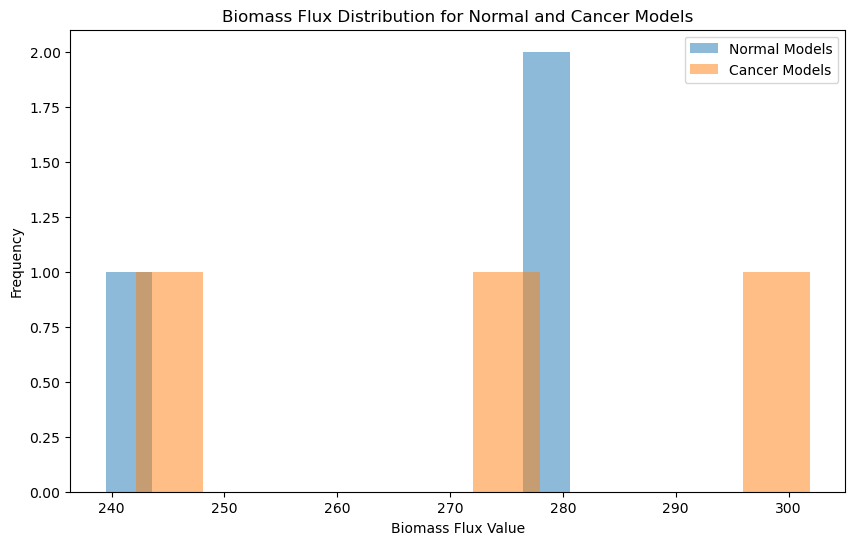

In [36]:
normal_biomass_flux_values = [solution_normal1.objective_value,
                              solution_normal2.objective_value,
                              solution_normal3.objective_value]
cancer_biomass_flux_values = [solution_cancer1.objective_value,
                              solution_cancer2.objective_value,
                              solution_cancer3.objective_value]

# Create histograms
plt.figure(figsize=(10, 6))
plt.hist(normal_biomass_flux_values, bins=10, alpha=0.5, label='Normal Models')
plt.hist(cancer_biomass_flux_values, bins=10, alpha=0.5, label='Cancer Models')

# Add labels and title
plt.xlabel('Biomass Flux Value')
plt.ylabel('Frequency')
plt.title('Biomass Flux Distribution for Normal and Cancer Models')
plt.legend()

# Show the plot
plt.show()

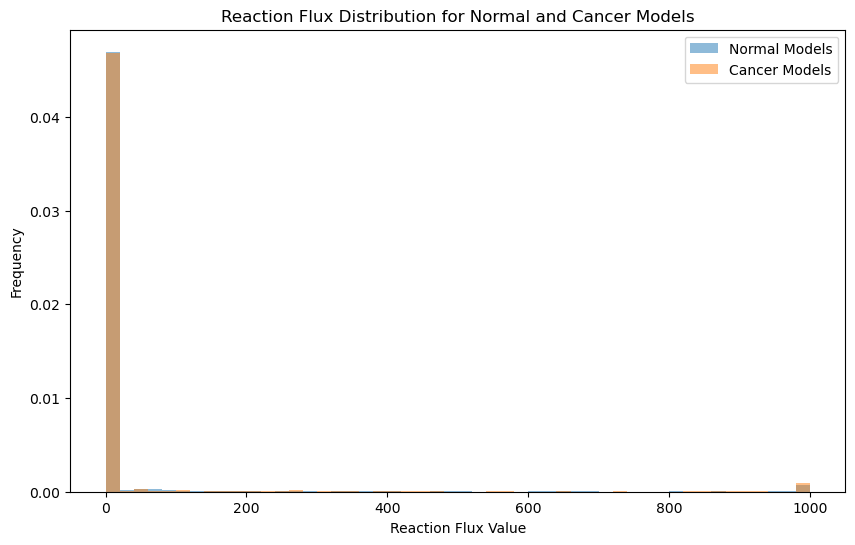

In [37]:
normal_flux_values = []
for model_solution in [solution_normal1, solution_normal2, solution_normal3]:
    flux_values = [abs(value) for value in model_solution.fluxes.values]
    normal_flux_values.extend(flux_values)

# Extract reaction flux values for cancer models
cancer_flux_values = []
for model_solution in [solution_cancer1, solution_cancer2, solution_cancer3]:
    flux_values = [abs(value) for value in model_solution.fluxes.values]
    cancer_flux_values.extend(flux_values)

# Create histograms
plt.figure(figsize=(10, 6))
plt.hist(normal_flux_values, bins=50, alpha=0.5, label='Normal Models', density=True)
plt.hist(cancer_flux_values, bins=50, alpha=0.5, label='Cancer Models', density=True)

# Add labels and title
plt.xlabel('Reaction Flux Value')
plt.ylabel('Frequency')
plt.title('Reaction Flux Distribution for Normal and Cancer Models')
plt.legend()

# Show the plot
plt.show()

C:\Users\NOE\AppData\Local\Temp\ipykernel_13744\1286089472.py:8: RuntimeWarning: invalid value encountered in log2
  log_fold_change = np.log2(cancer_flux_values + 1) - np.log2(normal_flux_values + 1)


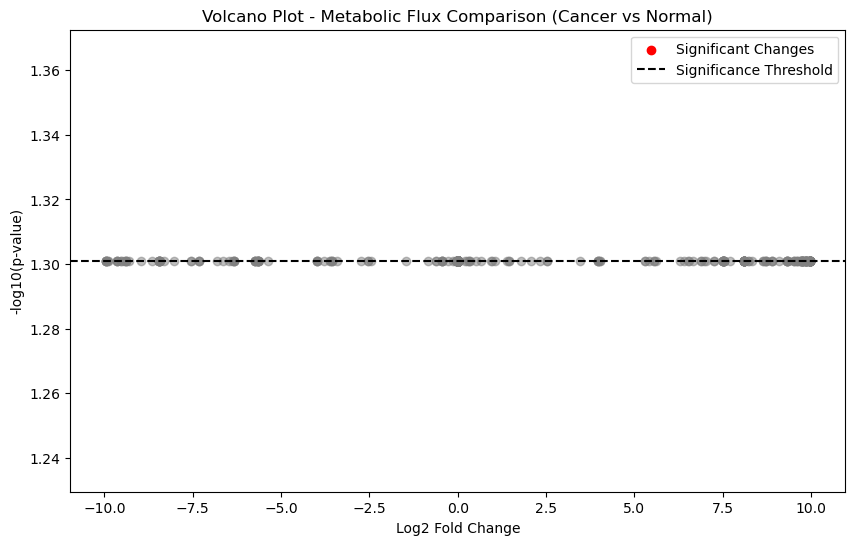

In [38]:
normal_reaction_names = solution_normal1.fluxes.index.tolist()
cancer_reaction_names = solution_cancer1.fluxes.index.tolist()
common_reaction_names = list(set(normal_reaction_names).intersection(cancer_reaction_names))

normal_flux_values = solution_normal1.fluxes.loc[common_reaction_names].values
cancer_flux_values = solution_cancer1.fluxes.loc[common_reaction_names].values

log_fold_change = np.log2(cancer_flux_values + 1) - np.log2(normal_flux_values + 1)
p_value = 0.05  # Replace this with your actual p-values or significance values
neg_log_p_value = -np.log10(p_value)
volcano_df = pd.DataFrame({
    'Log2 Fold Change': log_fold_change,
    '-log10(p-value)': neg_log_p_value
}, index=common_reaction_names)

# Set a significance threshold for highlighting points
significance_threshold = -np.log10(0.05)
plt.figure(figsize=(10, 6))
plt.scatter(volcano_df['Log2 Fold Change'], volcano_df['-log10(p-value)'], c='gray', alpha=0.5)
plt.scatter(volcano_df.loc[volcano_df['-log10(p-value)'] > significance_threshold, 'Log2 Fold Change'],
            volcano_df.loc[volcano_df['-log10(p-value)'] > significance_threshold, '-log10(p-value)'],
            c='red', label='Significant Changes')
plt.axhline(y=significance_threshold, color='black', linestyle='--', label='Significance Threshold')
plt.xlabel('Log2 Fold Change')
plt.ylabel('-log10(p-value)')
plt.title('Volcano Plot - Metabolic Flux Comparison (Cancer vs Normal)')
plt.legend()
plt.show()

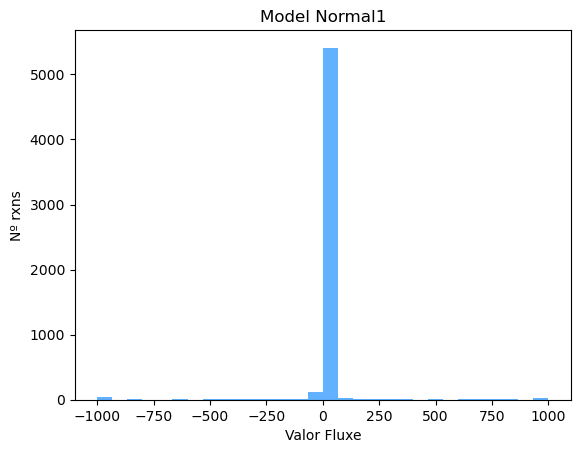

In [129]:
tabla_flujos_normal1={'Flujos_Normal1':solution_normal1.fluxes}
tabla_flujos_normal1=pd.DataFrame(tabla_flujos_normal1)
plt.hist(tabla_flujos_normal1['Flujos_Normal1'], bins=30, color='dodgerblue', alpha=0.7)
plt.title('Model Normal1')
plt.xlabel('Valor Fluxe')
plt.ylabel('Nº rxns')
plt.grid(False)

In [131]:
tabla_flujos_normal1={'Flujos_Normal1':solution_normal1.fluxes}
tabla_flujos_normal1=pd.DataFrame(tabla_flujos_normal1)
tabla_flujos_normal1

,Flujos_Normal1
10FTHF7GLUtl,0.0
10FTHF7GLUtm,0.0
10FTHFtl,0.0
11DOCRTSLtm,0.0
11DOCRTSLtr,0.0
...,...
DM_CE1562[c],0.0
DM_CE5025[c],0.0
DM_btn[n],0.0
Htmi,0.0


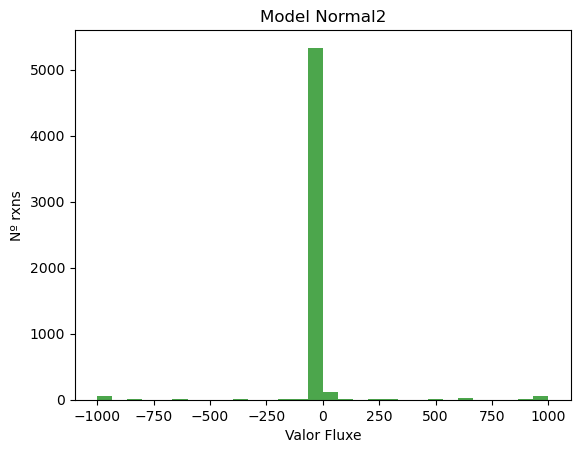

In [132]:
tabla_flujos_normal2={'Flujos_Normal2':solution_normal2.fluxes}
tabla_flujos_normal2=pd.DataFrame(tabla_flujos_normal2)

plt.hist(tabla_flujos_normal2['Flujos_Normal2'], bins=30, color='green', alpha=0.7)
plt.title('Model Normal2')
plt.xlabel('Valor Fluxe')
plt.ylabel('Nº rxns')
plt.grid(False)

In [43]:
tabla_flujos_normal2

,Flujos_Normal2
10FTHF7GLUtl,0.0
10FTHF7GLUtm,0.0
10FTHFtl,0.0
10FTHFtm,0.0
11DOCRTSLtm,0.0
...,...
DM_CE1562[c],0.0
DM_1a2425thvitd2[m],0.0
DM_btn[n],0.0
Htmi,0.0


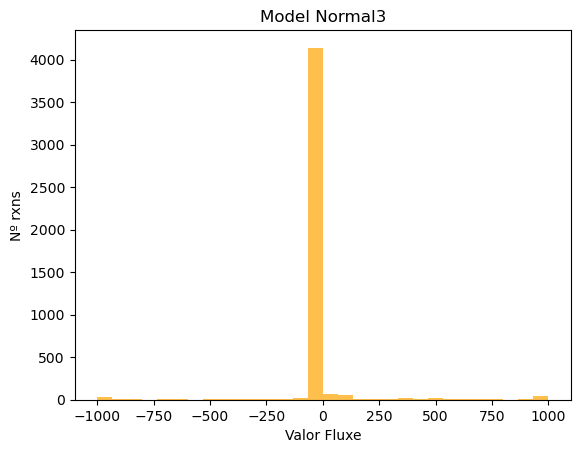

In [133]:
tabla_flujos_normal3={'Flujos_Normal3':solution_normal3.fluxes}
tabla_flujos_normal3=pd.DataFrame(tabla_flujos_normal3)

plt.hist(tabla_flujos_normal3['Flujos_Normal3'], bins=30, color='orange', alpha=0.7)
plt.title('Model Normal3')
plt.xlabel('Valor Fluxe')
plt.ylabel('Nº rxns')
plt.grid(False)

In [45]:
tabla_flujos_normal3

,Flujos_Normal3
10FTHF7GLUtl,0.0
10FTHF7GLUtm,0.0
10FTHFtl,0.0
10FTHFtm,0.0
11DOCRTSLtm,0.0
...,...
DM_4abut[c],0.0
DM_srtn[c],0.0
DM_btn[n],0.0
Htmi,0.0


In [46]:
flujos_normal=pd.concat([tabla_flujos_normal1,tabla_flujos_normal2,tabla_flujos_normal3])
flujos_normal

,Flujos_Normal1,log2_average_normal1,Flujos_Normal2,Flujos_Normal3
10FTHF7GLUtl,0.0,-inf,NaN,NaN
10FTHF7GLUtm,0.0,-inf,NaN,NaN
10FTHFtl,0.0,-inf,NaN,NaN
11DOCRTSLtm,0.0,-inf,NaN,NaN
11DOCRTSLtr,0.0,-inf,NaN,NaN
...,...,...,...,...
DM_4abut[c],NaN,NaN,NaN,0.0
DM_srtn[c],NaN,NaN,NaN,0.0
DM_btn[n],NaN,NaN,NaN,0.0
Htmi,NaN,NaN,NaN,0.0


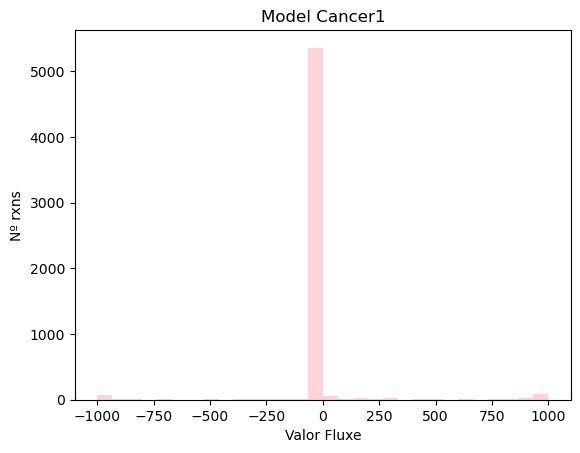

In [134]:
tabla_flujos_cancer1={'Flujos_Cancer1':solution_cancer1.fluxes}
tabla_flujos_cancer1=pd.DataFrame(tabla_flujos_cancer1)

plt.hist(tabla_flujos_cancer1['Flujos_Cancer1'], bins=30, color='pink', alpha=0.7)
plt.title('Model Cancer1')
plt.xlabel('Valor Fluxe')
plt.ylabel('Nº rxns')
plt.grid(False)

In [48]:
tabla_flujos_cancer1

,Flujos_Cancer1
10FTHF7GLUtl,0.0
10FTHF7GLUtm,0.0
10FTHFtl,0.0
10FTHFtm,0.0
11DOCRTSLtm,0.0
...,...
DM_kynate[c],0.0
DM_1a2425thvitd2[m],0.0
DM_btn[n],0.0
Htmi,0.0


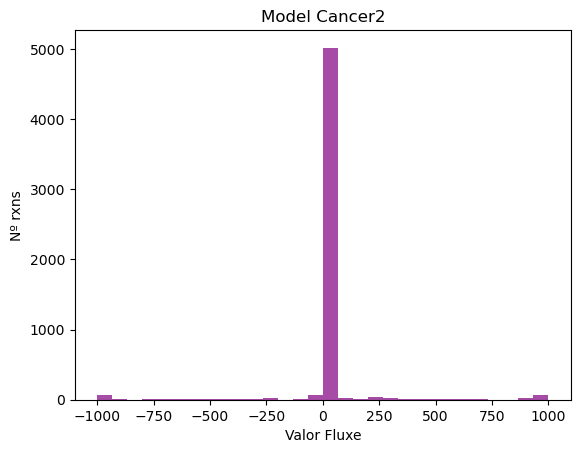

In [135]:
tabla_flujos_cancer2={'Flujos_Cancer2':solution_cancer2.fluxes}
tabla_flujos_cancer2=pd.DataFrame(tabla_flujos_cancer2)

plt.hist(tabla_flujos_cancer2['Flujos_Cancer2'], bins=30, color='purple', alpha=0.7)
plt.title('Model Cancer2')
plt.xlabel('Valor Fluxe')
plt.ylabel('Nº rxns')
plt.grid(False)

In [50]:
tabla_flujos_cancer2

,Flujos_Cancer2
10FTHF7GLUtl,0.0
10FTHF7GLUtm,0.0
10FTHFtl,0.0
10FTHFtm,-1000.0
13DAMPPOX,0.0
...,...
DM_kynate[c],0.0
DM_1a2425thvitd2[m],0.0
DM_btn[n],0.0
Htmi,0.0


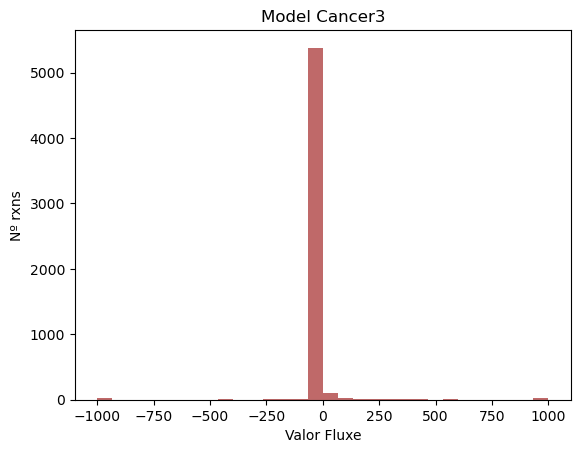

In [137]:
tabla_flujos_cancer3={'Flujos_Cancer3':solution_cancer3.fluxes}
tabla_flujos_cancer3=pd.DataFrame(tabla_flujos_cancer3)

plt.hist(tabla_flujos_cancer3['Flujos_Cancer3'], bins=30, color='brown', alpha=0.7)
plt.title('Model Cancer3')
plt.xlabel('Valor Fluxe')
plt.ylabel('Nº rxns')
plt.grid(False)

In [53]:
tabla_flujos_cancer3

,Flujos_Cancer3
10FTHF7GLUtl,0.0
10FTHF7GLUtm,0.0
10FTHFtl,0.0
10FTHFtm,0.0
11DOCRTSLtm,0.0
...,...
DM_4glu56dihdind[c],0.0
DM_kynate[c],0.0
DM_btn[n],0.0
Htmi,0.0


In [54]:
flujos_cancer=pd.concat([tabla_flujos_cancer1,tabla_flujos_cancer2,tabla_flujos_cancer3],axis=1)
flujos_cancer

,Flujos_Cancer1,Flujos_Cancer2,Flujos_Cancer3
10FTHF7GLUtl,0.0,0.0,0.000000
10FTHF7GLUtm,0.0,0.0,0.000000
10FTHFtl,0.0,0.0,0.000000
10FTHFtm,0.0,-1000.0,0.000000
11DOCRTSLtm,0.0,NaN,0.000000
...,...,...,...
1A25HVITD2t,NaN,NaN,0.000000
1A25HVITD2tm,NaN,NaN,0.000000
EX_1a25dhvitd2[e],NaN,NaN,0.000000
sink_leu_L[c],NaN,NaN,-45.102369


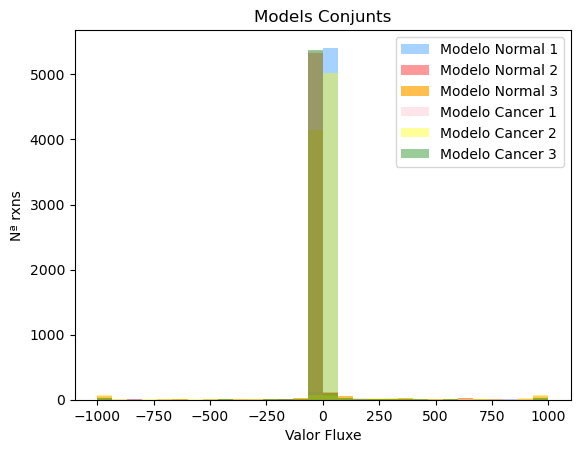

In [60]:
fluxesM=pd.concat([tabla_flujos_normal1, tabla_flujos_normal2, tabla_flujos_normal3, tabla_flujos_cancer1, tabla_flujos_cancer2, tabla_flujos_cancer3], axis=1) 
fluxesM   
plt.hist(fluxesM['Flujos_Normal1'], bins=30, color='dodgerblue', alpha=0.4, label='Modelo Normal 1')
plt.hist(fluxesM['Flujos_Normal2'], bins=30, color='red', alpha=0.4, label='Modelo Normal 2')
plt.hist(fluxesM['Flujos_Normal3'], bins=30, color='orange', alpha=0.7, label='Modelo Normal 3')
plt.hist(fluxesM['Flujos_Cancer1'], bins=30, color='pink', alpha=0.4, label='Modelo Cancer 1')
plt.hist(fluxesM['Flujos_Cancer2'], bins=30, color='yellow', alpha=0.4, label='Modelo Cancer 2')
plt.hist(fluxesM['Flujos_Cancer3'], bins=30, color='green', alpha=0.4, label='Modelo Cancer 3')

plt.title('Models Conjunts')
plt.xlabel('Valor Fluxe')
plt.ylabel('Nª rxns')
plt.legend(loc='upper right')
plt.grid(False)

In [61]:
fluxesM


,Flujos_Normal1,Flujos_Normal2,Flujos_Normal3,Flujos_Cancer1,Flujos_Cancer2,Flujos_Cancer3
10FTHF7GLUtl,0.0,0.0,0.0,0.0,0.0,0.0
10FTHF7GLUtm,0.0,0.0,0.0,0.0,0.0,0.0
10FTHFtl,0.0,0.0,0.0,0.0,0.0,0.0
11DOCRTSLtm,0.0,0.0,0.0,0.0,NaN,0.0
11DOCRTSLtr,0.0,0.0,0.0,0.0,NaN,0.0
...,...,...,...,...,...,...
DM_phsph1p[c],NaN,NaN,NaN,NaN,NaN,0.0
HMR_9613,NaN,NaN,NaN,NaN,NaN,0.0
DM_3dhlchol[c],NaN,NaN,NaN,NaN,NaN,0.0
EX_gcdca3s[e],NaN,NaN,NaN,NaN,NaN,0.0


## TRANSFORMAR DADES

In [73]:
def flux_transformer(v):
    '''
    This function transforms fluxes into log2 scale with three additions:
    - zero values are kept.
    - values between 0 and 2 are adjusted to fit below one.
    - negative fluxes are considered. 
    '''

    def adjusted(v):
        new = (np.log2(v + 0.125) + 3) / 4
        return np.min([new, 1])

    if v == 0:
        vprime = 0
    elif v > 0:
        if v < 2:
            vprime = adjusted(v)
        else:
            vprime = np.log2(v)
    elif v < 0:
        v = np.abs(v)
        if v < 2:
            vprime = -adjusted(v)
        else:
            vprime = -np.log2(v)
    else:
        raise ValueError('found value not considered')

    return vprime

In [74]:
flujos_t_normal1 = tabla_flujos_normal1.applymap(flux_transformer)
flujos_t_normal1

,Flujos_Normal1
10FTHF7GLUtl,0.0
10FTHF7GLUtm,0.0
10FTHFtl,0.0
11DOCRTSLtm,0.0
11DOCRTSLtr,0.0
...,...
DM_CE1562[c],0.0
DM_CE5025[c],0.0
DM_btn[n],0.0
Htmi,0.0


(array([  71.,   21.,   14.,   15.,   30., 5425.,   22.,   20.,   34.,
          86.]),
 array([-9.96578428, -7.97262743, -5.97947057, -3.98631371, -1.99315686,
         0.        ,  1.99315686,  3.98631371,  5.97947057,  7.97262743,
         9.96578428]),
 <BarContainer object of 10 artists>)

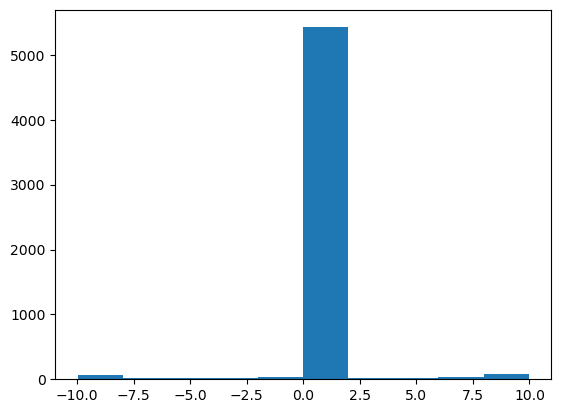

In [75]:
plt.hist(flujos_t_normal1)

In [76]:
flujos_t_normal2 = tabla_flujos_normal2.applymap(flux_transformer)
flujos_t_normal2

,Flujos_Normal2
10FTHF7GLUtl,0.0
10FTHF7GLUtm,0.0
10FTHFtl,0.0
10FTHFtm,0.0
11DOCRTSLtm,0.0
...,...
DM_CE1562[c],0.0
DM_1a2425thvitd2[m],0.0
DM_btn[n],0.0
Htmi,0.0


(array([  81.,   19.,   50.,   15.,   57., 5223.,   22.,   81.,   19.,
         112.]),
 array([-9.96578428, -7.97262743, -5.97947057, -3.98631371, -1.99315686,
         0.        ,  1.99315686,  3.98631371,  5.97947057,  7.97262743,
         9.96578428]),
 <BarContainer object of 10 artists>)

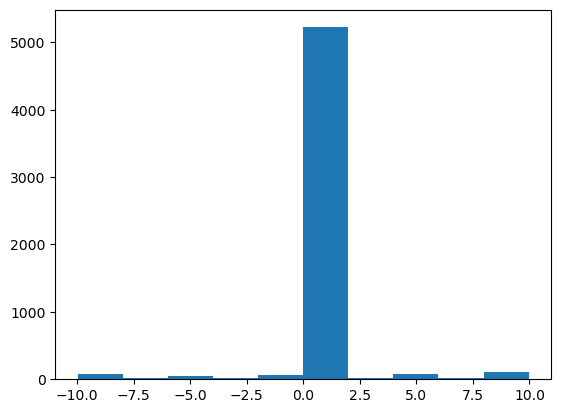

In [49]:
plt.hist(flujos_t_normal2)

In [77]:
flujos_t_normal3 = tabla_flujos_normal3.applymap(flux_transformer)
flujos_t_normal3

,Flujos_Normal3
10FTHF7GLUtl,0.0
10FTHF7GLUtm,0.0
10FTHFtl,0.0
10FTHFtm,0.0
11DOCRTSLtm,0.0
...,...
DM_4abut[c],0.0
DM_srtn[c],0.0
DM_btn[n],0.0
Htmi,0.0


(array([  87.,   33.,   20.,   10.,   20., 4109.,   23.,   28.,   75.,
         133.]),
 array([-9.96578428, -7.97262743, -5.97947057, -3.98631371, -1.99315686,
         0.        ,  1.99315686,  3.98631371,  5.97947057,  7.97262743,
         9.96578428]),
 <BarContainer object of 10 artists>)

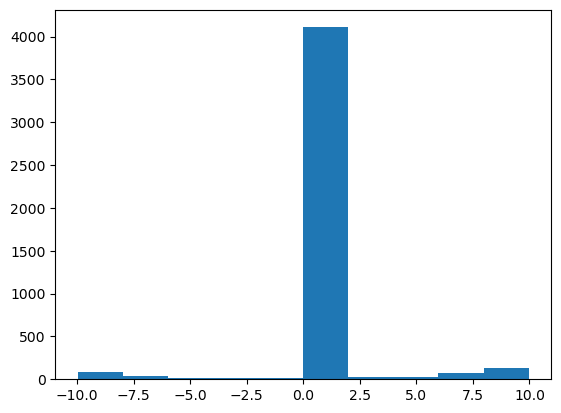

In [78]:
plt.hist(flujos_t_normal3)

In [79]:
flujos_t_cancer1 = tabla_flujos_cancer1.applymap(flux_transformer)
flujos_t_cancer1

,Flujos_Cancer1
10FTHF7GLUtl,0.0
10FTHF7GLUtm,0.0
10FTHFtl,0.0
10FTHFtm,0.0
11DOCRTSLtm,0.0
...,...
DM_kynate[c],0.0
DM_1a2425thvitd2[m],0.0
DM_btn[n],0.0
Htmi,0.0


(array([ 124.,   33.,   14.,   14.,   39., 5305.,   22.,   17.,   48.,
         175.]),
 array([-9.96578428, -7.97262743, -5.97947057, -3.98631371, -1.99315686,
         0.        ,  1.99315686,  3.98631371,  5.97947057,  7.97262743,
         9.96578428]),
 <BarContainer object of 10 artists>)

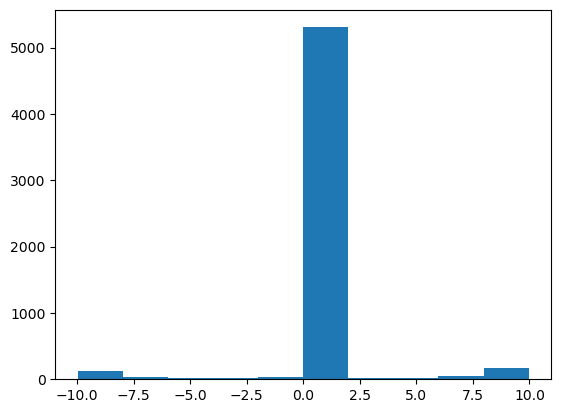

In [80]:
plt.hist(flujos_t_cancer1)

In [81]:
flujos_t_cancer2 = tabla_flujos_cancer2.applymap(flux_transformer)
flujos_t_cancer2

,Flujos_Cancer2
10FTHF7GLUtl,0.000000
10FTHF7GLUtm,0.000000
10FTHFtl,0.000000
10FTHFtm,-9.965784
13DAMPPOX,0.000000
...,...
DM_kynate[c],0.000000
DM_1a2425thvitd2[m],0.000000
DM_btn[n],0.000000
Htmi,0.000000


(array([ 131.,   33.,   20.,   15.,   28., 4961.,   16.,   45.,   62.,
         181.]),
 array([-9.96578428, -7.97262743, -5.97947057, -3.98631371, -1.99315686,
         0.        ,  1.99315686,  3.98631371,  5.97947057,  7.97262743,
         9.96578428]),
 <BarContainer object of 10 artists>)

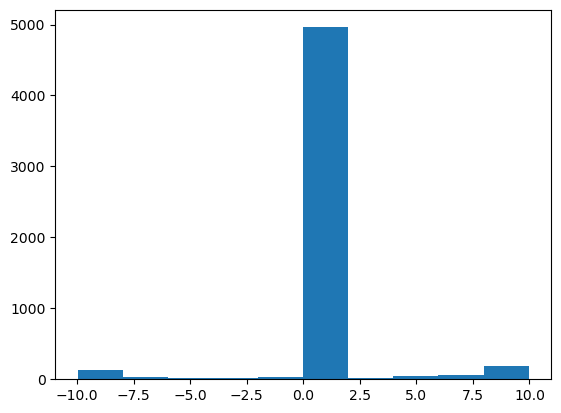

In [82]:
plt.hist(flujos_t_cancer2)

In [83]:
flujos_t_cancer3 = tabla_flujos_cancer3.applymap(flux_transformer)
flujos_t_cancer3

,Flujos_Cancer3
10FTHF7GLUtl,0.0
10FTHF7GLUtm,0.0
10FTHFtl,0.0
10FTHFtm,0.0
11DOCRTSLtm,0.0
...,...
DM_4glu56dihdind[c],0.0
DM_kynate[c],0.0
DM_btn[n],0.0
Htmi,0.0


(array([  44.,   28.,   23.,   25.,  111., 5230.,   56.,   35.,   39.,
          60.]),
 array([-9.96578428, -7.97262743, -5.97947057, -3.98631371, -1.99315686,
         0.        ,  1.99315686,  3.98631371,  5.97947057,  7.97262743,
         9.96578428]),
 <BarContainer object of 10 artists>)

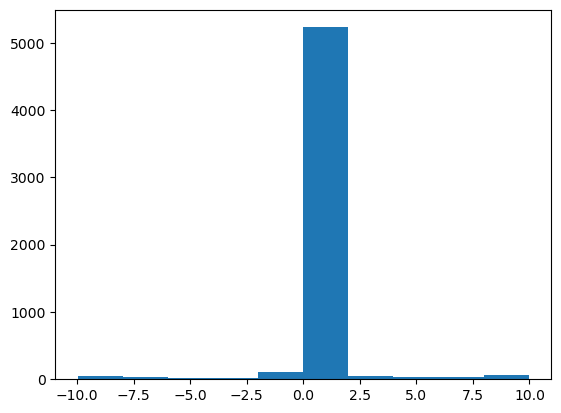

In [84]:
plt.hist(flujos_t_cancer3)

In [85]:
flujos_t_normal= pd.concat([flujos_t_normal1,flujos_t_normal2,flujos_t_normal3], axis=1)
flujos_t_normal

,Flujos_Normal1,Flujos_Normal2,Flujos_Normal3
10FTHF7GLUtl,0.0,0.0,0.000000
10FTHF7GLUtm,0.0,0.0,0.000000
10FTHFtl,0.0,0.0,0.000000
11DOCRTSLtm,0.0,0.0,0.000000
11DOCRTSLtr,0.0,0.0,0.000000
...,...,...,...
sink_asp_L[c],NaN,NaN,9.838519
sink_tyr_L[c],NaN,NaN,-6.821581
DM_5cysdopa[c],NaN,NaN,0.000000
DM_4abut[c],NaN,NaN,0.000000


In [86]:
flujos_t_cancer= pd.concat([flujos_t_cancer1,flujos_t_cancer2,flujos_t_cancer3], axis=1)
flujos_t_cancer

,Flujos_Cancer1,Flujos_Cancer2,Flujos_Cancer3
10FTHF7GLUtl,0.0,0.000000,0.000000
10FTHF7GLUtm,0.0,0.000000,0.000000
10FTHFtl,0.0,0.000000,0.000000
10FTHFtm,0.0,-9.965784,0.000000
11DOCRTSLtm,0.0,NaN,0.000000
...,...,...,...
1A25HVITD2t,NaN,NaN,0.000000
1A25HVITD2tm,NaN,NaN,0.000000
EX_1a25dhvitd2[e],NaN,NaN,0.000000
sink_leu_L[c],NaN,NaN,-5.495131


In [87]:
flujos_t=pd.concat([flujos_t_cancer,flujos_t_normal], axis=1)
flujos_t

,Flujos_Cancer1,Flujos_Cancer2,Flujos_Cancer3,Flujos_Normal1,Flujos_Normal2,Flujos_Normal3
10FTHF7GLUtl,0.0,0.000000,0.0,0.0,0.0,0.000000
10FTHF7GLUtm,0.0,0.000000,0.0,0.0,0.0,0.000000
10FTHFtl,0.0,0.000000,0.0,0.0,0.0,0.000000
10FTHFtm,0.0,-9.965784,0.0,NaN,0.0,0.000000
11DOCRTSLtm,0.0,NaN,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...
sink_lys_L[c],NaN,NaN,NaN,NaN,NaN,-8.579218
sink_phe_L[c],NaN,NaN,NaN,NaN,NaN,-5.957262
sink_asp_L[c],NaN,NaN,NaN,NaN,NaN,9.838519
sink_tyr_L[c],NaN,NaN,NaN,NaN,NaN,-6.821581


# Volacno Plot

In [88]:
flujos_t

,Flujos_Cancer1,Flujos_Cancer2,Flujos_Cancer3,Flujos_Normal1,Flujos_Normal2,Flujos_Normal3
10FTHF7GLUtl,0.0,0.000000,0.0,0.0,0.0,0.000000
10FTHF7GLUtm,0.0,0.000000,0.0,0.0,0.0,0.000000
10FTHFtl,0.0,0.000000,0.0,0.0,0.0,0.000000
10FTHFtm,0.0,-9.965784,0.0,NaN,0.0,0.000000
11DOCRTSLtm,0.0,NaN,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...
sink_lys_L[c],NaN,NaN,NaN,NaN,NaN,-8.579218
sink_phe_L[c],NaN,NaN,NaN,NaN,NaN,-5.957262
sink_asp_L[c],NaN,NaN,NaN,NaN,NaN,9.838519
sink_tyr_L[c],NaN,NaN,NaN,NaN,NaN,-6.821581


In [89]:
from scipy import stats
from statsmodels.stats import multitest
import seaborn as sns

In [124]:
normal_columns=['Flujos_Normal1','Flujos_Normal2','Flujos_Normal3']
cancer_columns=['Flujos_Cancer1','Flujos_Cancer2','Flujos_Cancer3']

normal_df_selected=flujos_t[normal_columns]
cancer_df_selected=flujos_t[cancer_columns]
cancer_columns

['Flujos_Cancer1', 'Flujos_Cancer2', 'Flujos_Cancer3']

In [125]:
t_statistic, p_values = stats.ttest_ind(normal_df_selected, cancer_df_selected, axis = 1, nan_policy = 'omit')
p_values

C:\Users\NOE\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:565: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  return result_to_tuple(hypotest_fun_out(*samples, **kwds))
C:\Users\NOE\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:7030: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df


array([nan, nan, nan, ..., nan, nan, nan])

In [123]:

fold_change = np.mean(cancer_df_selected) - np.mean(normal_df_selected)
fold_change

0.010315729568851129

In [107]:

reject, q_values = multitest.fdrcorrection(p_values)




In [122]:
t_results = pd.DataFrame({'reaction': normal_df_selected.columns, 'p_value': p_values,'q_value': q_values, 'log_fc': fold_change
})

t_results['sign'] = 'NORMAL'
for idx, row in t_results.iterrows():
    if row['q_value'] < 0.05 and row['log_fc'] > 1:
        t_results.loc[idx, 'sign'] = 'UP'
    elif row['q_value'] < 0.05 and row['log_fc'] < -1:
        t_results.loc[idx, 'sign'] = 'DOWN'

t_fluxes_sign = normal_df_selected[t_results[t_results['sign'] != 'NORMAL']['reaction'].values]
t_fluxes_sign.head()


Empty DataFrame
Columns: []
Index: [10FTHF7GLUtl, 10FTHF7GLUtm, 10FTHFtl, 10FTHFtm, 11DOCRTSLtm, 11DOCRTSLtr, 11DOCRTSTRNtm, 11DOCRTSTRNtr, 13DAMPPOX, 1a_25VITD2Hm, 25HVITD2tin_m, 25HVITD3tin_m, 25VITD2Hm, 25VITD3Hm, 2AMACHYD, 2AMADPTm, 2DR1PP, 2HBO, 2HBt2, 2HCO3_NAt, 2OXOADOXm, 2OXOADPTm, 34DHOXPEGOX, 34DHOXPEGt, 34DHPHAMT, 34DHPLACOX, 34DHPLACOX_NADP_, 34DHXMANDACOX, 34DHXMANDACOX_NADP_, 34HPLFM, 34HPPOR, 35CGMPtn, 3AIBTm, 3AIBtmi, 3DPHBH1, 3DSPHR, 3HAO, 3HBCDm, 3HBCOAHLm, 3HKYNAKGAT, 3HLYTCL, 3M4HDXPAC, 3MLDAt, 3MOX4HOXPGALDOX, 3MOX4HOXPGALDOX_NADP_, 3MOXTYROX, 3SALAASPm, 3SALACBOXL, 3SALAOX, 3SALATAi, 3SALATAim, 3SPYRSP, 3SPYRSPm, 41R1H2MAE12BOOX, 41R2A1H12BOOX, 42A12BOOX, 4ABUTtm, 4HGLSDm, 4HOXPACDOX_NADP_, 4MOPt2im, 4MPTNLte, 4MPTNLtm, 4NPHSFte, 4NPHSULT, 4NPHte, 4PYRDX, 5ADTSTSTERONESte, 5ADTSTSTERONESULT, 5ADTSTSTERONEtr, 5AOPtm, 5FTHFt2, 5HLTDL, 5HOXINDACTO2OX, 5HTRPVESSEC, 5MTHFt, 5MTHFt2, 7DHFtl, 7DHFtm, 7THFtl, 7THFtm, A_MANASEly, A4GALTc, A4GALTg, AACTOOR, AACTtm, AATAi, A

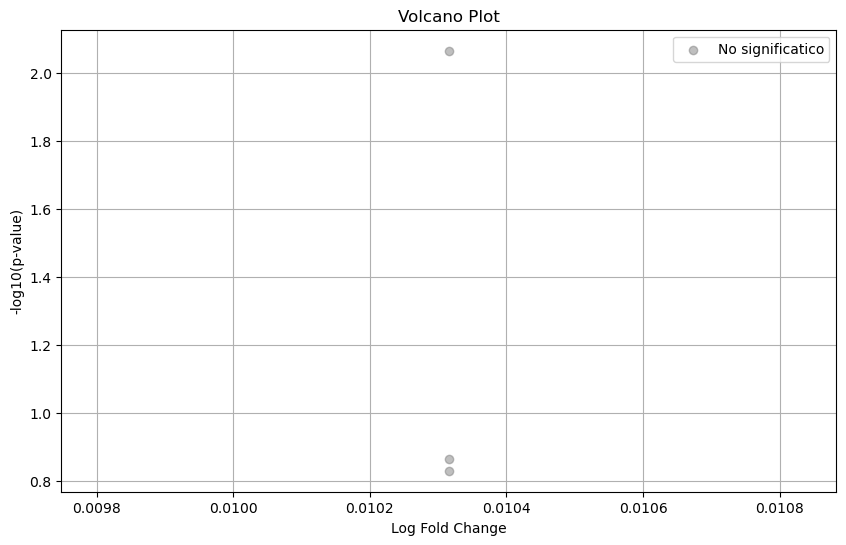

In [113]:
significance_threshold=0.05
significant_results= t_results[t_results['q_value']< significance_threshold]
plt.figure(figsize = (10, 6))

plt.scatter(t_results['log_fc'], -np.log10(t_results['p_value']),color='gray', alpha=0.5, label='No significatico')

plt.xlabel('Log Fold Change')
plt.ylabel('-log10(p-value)')
plt.title('Volcano Plot')
plt.legend()
plt.grid(True)
plt.show()

In [81]:
umbral_p_valor = 0.05

# Crear el gráfico de tipo Volcano Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Flujos_Normal1', y=-np.log10(normal_df_selected[normal_columns]),
                color='blue', label='Normal 1', alpha=0.7)
sns.scatterplot(x='Flujos_Cancer1', y=-np.log10(cancer_df_selected[cancer_columns]),
                color='red', label='Cancer 1', alpha=0.7)

# Resaltar puntos significativos (p < umbral_p_valor)
plt.axhline(-np.log10(umbral_p_valor), color='black', linestyle='--', label=f'Umbral p-valor = {umbral_p_valor}')


C:\Users\NOE\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)
C:\Users\NOE\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: invalid value encountered in log10
  result = func(self.values, **kwargs)


ValueError: Could not interpret value `Flujos_Normal1` for parameter `x`

<Figure size 1000x600 with 0 Axes>

In [87]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd

In [89]:
t_statistic_normal1, p_values_normal1 = stats.ttest_ind(flujos_t_normal1, axis = 0, nan_policy = 'omit')
fold_change_normal = np.mean(flujos_t_normal1) - np.mean(flujos_t_cancer1)


reject, q_values = multitest.fdrcorrection(p_values)
t_results = pd.DataFrame({
    'reaction': flujos_t_normal1.columns,
    'p_value': p_values,
    'q_value': q_values,
    'log_fc': fold_change
})
significance_threshold=0.05
significant_results= t_results[t_results['q_value']< significance_threshold]
plt.figure(figsize = (10, 6))

plt.scatter(t_results['log_fc'], -np.log10(t_results['p_value']),color='gray', alpha=0.5, label='No significatico')
plt.scatter(significant_results['log_fc'], -np.log10(significant_results['p-value']),color='red', label='Significativo')

plt.xlabel('Log Fold Change')
plt.ylabel('-log10(p-value)')
plt.title('Volcano Plot')
plt.legend('label')
plt.grid(True)
plt.show()

TypeError: ttest_ind() missing 1 required positional argument: 'b'